In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle 
from matplotlib.patches import Rectangle

from scripts import neuron_classification, visualizations

In [2]:
box_radius = 80
field_width = 264
x_min, y_min = 73, 77

FileNotFoundError: [Errno 2] No such file or directory: '/hpc/mzhu843/modelling/nest/results/place fields/inter/Neuron 3.png'

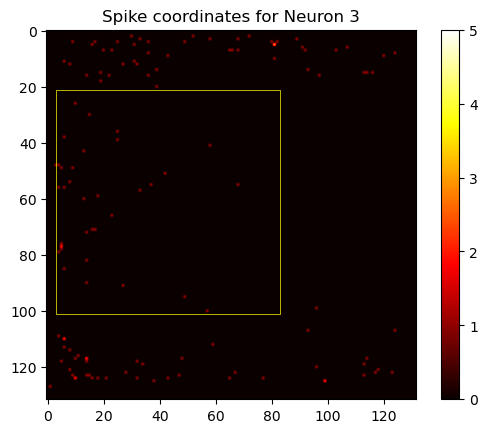

In [3]:
with open('/hpc/mzhu843/modelling/nest/results/filtered_neurons/neuron_groups.pickle', 'rb') as file:
    neuron_groups = pickle.load(file)

for group in neuron_groups.keys():
    for neuron in neuron_groups[group]:
        label = neuron[0]
        coords = neuron[1]
        centroid = neuron_classification.get_centroid(coords)
        box_top = (centroid[0] - x_min - box_radius) // 2
        box_left = (centroid[1] - y_min - box_radius) // 2
        heat_map = np.zeros((field_width // 2, field_width // 2))
        for coord in coords:
            x, y = round((coord[0] - x_min) // 2), round((coord[1] - y_min ) // 2)
            heat_map[x][y] += 1
        fig, ax = plt.subplots()
        cax = ax.imshow(heat_map, 'hot', vmin=0, vmax=5)
        box = Rectangle((box_left, box_top), box_radius, box_radius, linewidth=0.5, edgecolor='yellow', facecolor='none')
        ax.add_patch(box)
        ax.set_title('Spike coordinates for Neuron ' + str(label))
        plt.colorbar(cax)
        if group == 'Place':
            plt.savefig(f'/hpc/mzhu843/modelling/nest/results/place fields/place/Neuron {label}.png')
        if group == 'Interneuron':
            plt.savefig(f'/hpc/mzhu843/modelling/nest/results/place fields/inter/Neuron {label}.png')
        if group == "Silent":
            plt.savefig(f'/hpc/mzhu843/modelling/nest/results/place fields/silent/Neuron {label}.png')
        plt.close(fig)
            

